# Group 11 Skill

In [22]:
import pandas as pd
df= pd.read_csv("data/eda_data.csv")
df.head()

5 rows × 21 columns

In [24]:
import pandas as pd

skills_data = {
    "Name": ["Binderiya", "Pranjul", "Pratham", "Panyang"],
    "Python": [4, 4, 5, 3],
    "SQL": [4, 4, 5, 4],
    "Machine Learning": [2, 3, 2, 2],
    "PySpark": [3, 3, 3, 3],
    "Excel": [4, 5, 5, 4],
    "Data Visualization": [5, 5, 3, 3],
    "Power Bi/ Tableau": [4, 5, 3, 4],
    "Version Control Git": [4, 4, 3, 3],
    "ETL/Data pipeline": [3, 2, 1, 2],
    "Communication": [4, 4, 5, 3],
    "Project Management": [5, 5, 5, 3],
    "Cloud Computing": [4, 4, 2, 2]
}

df_skills = pd.DataFrame(skills_data)
df_skills.set_index("Name", inplace=True)
df_skills

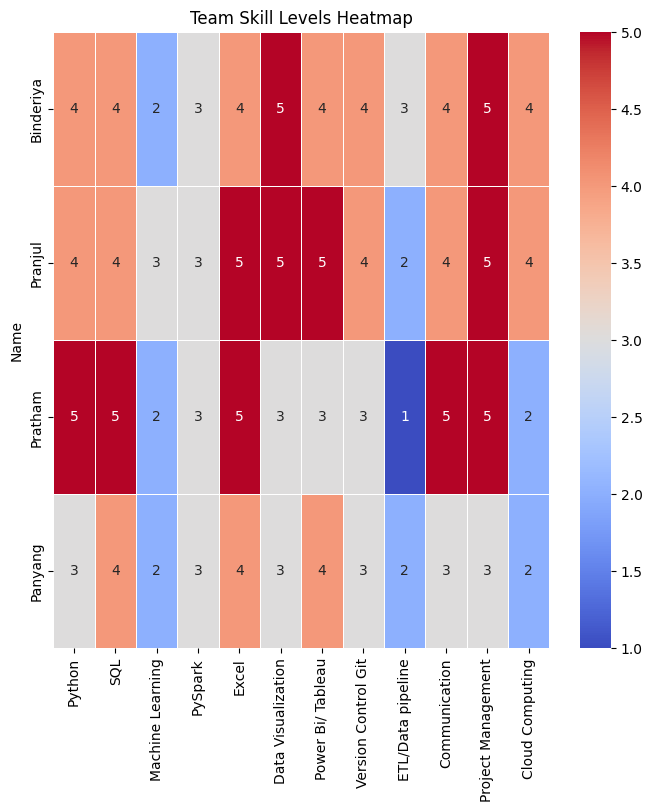

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(df_skills, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels Heatmap")
plt.show()

In [26]:
import plotly.graph_objects as go
fig = go.Figure()

for name in df_skills.index:
    values = df_skills.loc[name].tolist()
    values += values[:1]  # close the loop
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=df_skills.columns.tolist() + [df_skills.columns[0]],
        fill='toself',
        name=name
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 5])),
    showlegend=True,
    title='Team Skills Radar Chart'
)
fig.write_html("figures/skills_radar_chart.html")
fig.show()

Unable to display output for mime type(s): application/vnd.plotly.v1+json

From this radar chart visualization we can see that our team has a lot
of room for improvement for skills like PySpark and Machine Learning.
Also we can see that not a lot of our team mates are confident in their
skills in Cloud Computing and ETL.

## Top Skills

In [27]:
keywords = ['Data Analyst', 'Business Analyst', 'Data Engineering', 'Deep Learning',
            'Data Science', 'Data Analysis','Data Analytics',  'Market Research Analyst' 
            'LLM', 'Language Model', 'NLP', 'Natural Language Processing',
            'Computer Vision', 'Business Intelligence Analyst', 'Quantitative Analyst', 'Operations Analyst']

match = lambda col: df[col].str.contains('|'.join(keywords), case=False, na=False)

df['DATA_ANALYST_JOB'] = match('TITLE_NAME') \
             | match('SKILLS_NAME') \
             | match('SPECIALIZED_SKILLS_NAME') 
df['DATA_ANALYST_JOB'].value_counts()

DATA_ANALYST_JOB
False    37043
True     32155
Name: count, dtype: int64

In [32]:
from collections import defaultdict

# Lowercase everything
team_skills = [s.lower().strip() for s in df_skills.columns]
job_demand_raw = data_skills.copy()
job_demand_raw['Skill'] = job_demand_raw['Skill'].str.lower().str.strip()

# New dict to map cleaned team skill to total count from job postings
skill_demand_map = defaultdict(int)

for _, row in job_demand_raw.iterrows():
    skill_in_posting = row['Skill']
    count = row['Count']
    for team_skill in team_skills:
        if team_skill in skill_in_posting:
            skill_demand_map[team_skill] += count

In [34]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Safely apply literal_eval only to non-null values
df['SKILLS'] = df['SKILLS_NAME'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


data_skills = df[df['DATA_ANALYST_JOB']]['SKILLS'].explode().value_counts().reset_index()
data_skills.columns = ['Skill', 'Count']

fig = px.bar(data_skills, x='Skill', y='Count',
             title="Top Skills",
             labels={'Skill': 'Skill Name', 'Count': 'Frequency'},
             color='Skill')
df_skills.index = df_skills.index.str.strip()



In [35]:
team_skills = [s.strip().lower() for s in df_skills.columns]
print("Team skills:", team_skills)
print(job_demand_raw['Skill'].head(10).tolist())
for skill_text in job_demand_raw['Skill'].head(10):
    for team_skill in team_skills:
        if team_skill in skill_text:
            print(f"✅ '{team_skill}' found in: '{skill_text}'")



Team skills: ['python', 'sql', 'machine learning', 'pyspark', 'excel', 'data visualization', 'power bi/ tableau', 'version control git', 'etl/data pipeline', 'communication', 'project management', 'cloud computing']
['data analysis', 'sql (programming language)', 'communication', 'management', 'python (programming language)', 'tableau (business intelligence software)', 'dashboard', 'computer science', 'problem solving', 'power bi']
✅ 'sql' found in: 'sql (programming language)'
✅ 'communication' found in: 'communication'
✅ 'python' found in: 'python (programming language)'

In [36]:
for _, row in job_demand_raw.iterrows():
    skill_text = row['Skill']
    count = row['Count']
    for team_skill in team_skills:
        if team_skill in skill_text:  # no regex, just substring
            skill_demand_map[team_skill] += count

job_demand = pd.Series(skill_demand_map)
print(job_demand)


sql                   47368
communication         47728
python                21852
excel                 18682
data visualization    14568
project management    14568
machine learning       8386
cloud computing        2390
pyspark                1008
dtype: int64

In [37]:
job_demand = pd.Series(skill_demand_map)
job_demand.name = "Count"
team_avg = df_skills.mean()
team_avg.index = team_avg.index.str.strip().str.lower() 
# Now match only overlapping skills
common_skills = job_demand.index.intersection(team_avg.index)
team_avg = team_avg[common_skills]
job_demand = job_demand[common_skills]

# Normalize job demand
job_demand_normalized = 5 * (job_demand / job_demand.max())
job_demand_normalized.name = "Job Demand (Normalized)"

# Combine
comparison_df = pd.concat([team_avg, job_demand_normalized], axis=1)
comparison_df.columns = ["Team Average Skill", "Job Demand (Normalized)"]
comparison_df["Skill Gap"] = comparison_df["Job Demand (Normalized)"] - comparison_df["Team Average Skill"]
comparison_df.sort_values("Skill Gap", ascending=False, inplace=True)

comparison_df


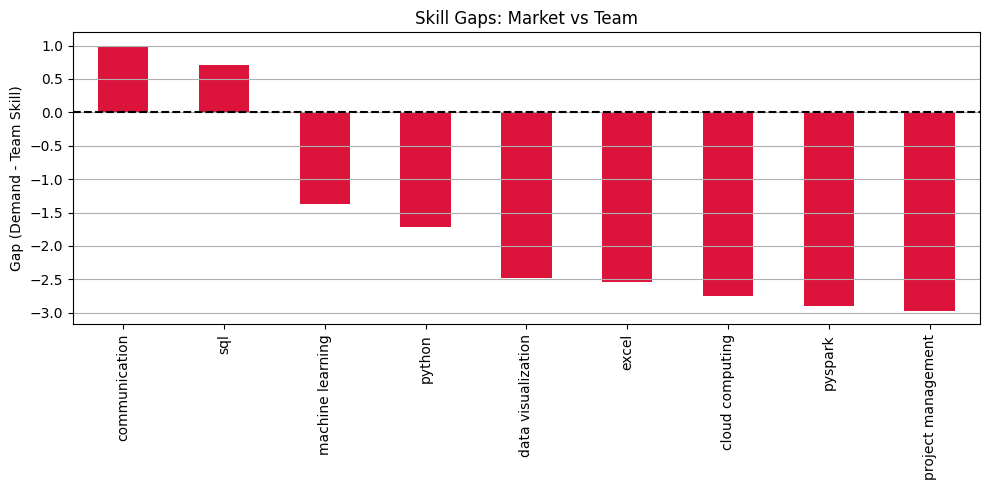

In [38]:
comparison_df["Skill Gap"].plot(kind='bar', color='crimson', figsize=(10, 5), title='Skill Gaps: Market vs Team')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Gap (Demand - Team Skill)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [39]:
comparison_df = comparison_df.reset_index().rename(columns={"index": "Skill"})

In [40]:
import plotly.express as px

fig = px.bar(
    comparison_df,
    x='Skill',
    y='Skill Gap',
    color='Skill Gap',
    color_continuous_scale='RdBu_r',
    title='Skill Gaps: Job Market Expectations vs. Team Capability',
    labels={'Skill Gap': 'Gap (Job Demand - Team Skill)', 'Skill': 'Skill'},
)

fig.add_hline(y=0, line_dash='dash')
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Gap (Positive = Market expects more)',
    font=dict(size=13),
    height=500,
    plot_bgcolor='white',
)
fig.write_html("figures/skill_gap_chart.html")


fig.show()



Unable to display output for mime type(s): application/vnd.plotly.v1+json

This bar chart compares our team’s average proficiency in key
data-related skills against job market expectations. Skills with
positive values (like communication and SQL) indicate areas where market
demand exceeds our current capabilities. On the other hand, negative
values highlight areas where the team is ahead or closely aligned with
market needs. Notably, skills like Python, cloud computing, and project
management show the largest gaps, suggesting priority areas for
upskilling.